In [ ]:
 %load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
bw.loocv <- function(x, grilla.h=NA) {
  if (anyNA(grilla.h)) {
    silver <- bw.nrd0(x)
    cant <- 100
    # 2 órdenes de magnitud alrededor de Silverman, está ok?
    grilla.h <- seq(from=silver/100, to=silver*100, length.out=cant)
  }
  n.h <- length(grilla.h)
  n.x <- length(x)
  loglikes <- rep(NA, n.h)
  for(j in 1:n.h) {
    h <- grilla.h[j]
    logs <- rep(NA, n.x)
    for (i in 1:n.x) {   # 3a) para cada índice i entre 1 y length(x)
      logs[i] = log(loo(x,h,i))    # genere logf^(−i)h, evalúelo en xi  y guarde el resultado
    }
    loglikes[j] <- mean(logs) #3b) computamos el promedio de los valores (i(h,CV))
  }
  h.opt <- grilla.h[which.max(loglikes)]
  return(list(h.cv=h.opt, grilla.h=grilla.h, loglikes=loglikes))
}

In [ ]:
%%R
loo <- function(x, h, i) {
  n.x <- length(x)
  suma <- 0
  for(j in 1:n.x) {
    if (j!=i) {
      suma = suma + dnorm((x[i]-x[j])/n.x, sd = 0.1) #Kernell Gaussiano
    }
  }
  return ((1/((n.x-1)*h))*suma)
}

In [ ]:
%%R

muestra <- function(seed, n=200) {
  set.seed(seed)
  binoms <- rbinom(n, size=1, p=0.75)
  return (
    binoms * rnorm(n, mean=0, sd=1)
    + (1 - binoms) * rnorm(n, mean=3.25, sd=sqrt(0.5))
  )
}

In [ ]:
%%R

X <- muestra(1234)
X

  [1]  0.414523534 -0.474718474  0.065993494 -0.502477782  3.266706540
  [6]  0.166989280 -0.896264626  0.168185388  0.354968261 -0.052105117
 [11] -0.195934619 -0.649069752 -1.109767231  3.221714579  0.022362526
 [16]  4.118127099 -1.244287851  0.169026414  0.673166307 -0.026276376
 [21] -0.191392169 -0.781906647  2.058161988  0.750501453  1.824208302
 [26]  2.743303757 -0.631409299  2.576349654  4.046543577  0.226301532
 [31]  1.013690347  0.252750135 -1.171948313  0.668714329 -1.650100935
 [36]  2.447283240 -0.316118329 -1.948246047  3.098586395  2.671740475
 [41] -0.334036650  1.395147893  0.636674411 -0.108431697  0.513762778
 [46]  0.399271807  1.662856447  0.275893404  0.506272623  2.885235085
 [51] -0.377237647  0.097619463  1.638744645 -0.875592474  0.121759999
 [56]  1.362130661 -0.234621087  2.629105721 -0.869783606  4.627948223
 [61]  3.910307861 -0.260639392 -0.414419706 -0.183050798  0.407056098
 [66]  0.624633128  1.678205744 -0.068693654 -0.320839913  1.471005717
 [71] 

In [ ]:
%%R

grilla.h <- seq(from=0.1, to=1, by=0.01)

L <- bw.loocv(X, grilla.h)

L

$h.cv
[1] 0.1

$grilla.h
 [1] 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24
[16] 0.25 0.26 0.27 0.28 0.29 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39
[31] 0.40 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54
[46] 0.55 0.56 0.57 0.58 0.59 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
[61] 0.70 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84
[76] 0.85 0.86 0.87 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99
[91] 1.00

$loglikes
 [1] 3.680398 3.585088 3.498077 3.418034 3.343926 3.274933 3.210395 3.149770
 [9] 3.092612 3.038544 2.987251 2.938461 2.891941 2.847489 2.804930 2.764108
[17] 2.724887 2.687147 2.650779 2.615688 2.581786 2.548996 2.517248 2.486476
[25] 2.456623 2.427635 2.399464 2.372066 2.345397 2.319422 2.294104 2.269411
[33] 2.245314 2.221783 2.198794 2.176321 2.154342 2.132836 2.111782 2.091163
[41] 2.070960 2.051158 2.031740 2.012692 1.993999 1.975650 1.957632 1.939932
[49] 1.92254

In [ ]:
%%R

#grilla.h <- seq(from=0.1, to=1, by=0.01)

#L <- bw.loocv(X, grilla.h)
L <- bw.loocv(X)

L

$h.cv
[1] 0.004774253

$grilla.h
  [1]  0.004774253  0.486973763  0.969173274  1.451372785  1.933572296
  [6]  2.415771807  2.897971317  3.380170828  3.862370339  4.344569850
 [11]  4.826769361  5.308968871  5.791168382  6.273367893  6.755567404
 [16]  7.237766915  7.719966425  8.202165936  8.684365447  9.166564958
 [21]  9.648764469 10.130963980 10.613163490 11.095363001 11.577562512
 [26] 12.059762023 12.541961534 13.024161044 13.506360555 13.988560066
 [31] 14.470759577 14.952959088 15.435158598 15.917358109 16.399557620
 [36] 16.881757131 17.363956642 17.846156152 18.328355663 18.810555174
 [41] 19.292754685 19.774954196 20.257153706 20.739353217 21.221552728
 [46] 21.703752239 22.185951750 22.668151260 23.150350771 23.632550282
 [51] 24.114749793 24.596949304 25.079148815 25.561348325 26.043547836
 [56] 26.525747347 27.007946858 27.490146369 27.972345879 28.454545390
 [61] 28.936744901 29.418944412 29.901143923 30.383343433 30.865542944
 [66] 31.347742455 31.829941966 32.312141477

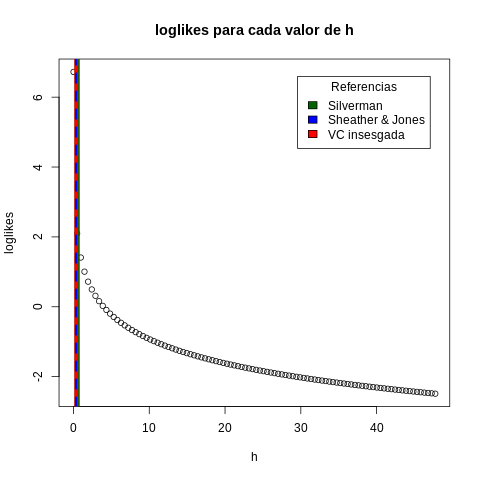

In [ ]:
%%R
plot(L$grilla.h,L$loglikes, xlab= "h", ylab="loglikes", main="loglikes para cada valor de h")
abline(v=bw.nrd0(X), col=c("darkgreen"), lwd=7)
abline(v=bw.ucv(X), col=c("red"), lwd=5)
abline(v=bw.SJ(X), col=c("blue"), lwd = 3, lty=2)
legend("topright", inset=.05, title="Referencias",
       c("Silverman", "Sheather & Jones", "VC insesgada"),
       fill=c("darkgreen","blue", "red")
       )

In [ ]:
%%R
bw.loocv(X)$h.cv

[1] 0.004774253


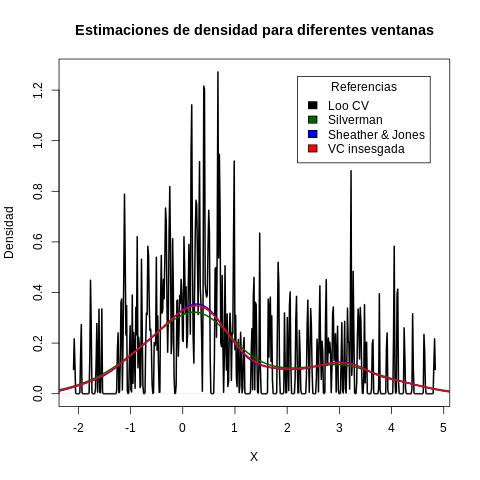

In [ ]:
%%R

plot(density(X,bw = bw.loocv(X)$h.cv), lwd = 2,
     main = "Estimaciones de densidad para diferentes ventanas",
     xlab= "X", ylab = "Densidad")
lines(density(X,bw = bw.nrd0(X)),lwd = 2, col = "darkgreen")
lines(density(X,bw = bw.SJ(X)),lwd = 2, col = "blue")
lines(density(X,bw = bw.ucv(X)),lwd = 2, col = "red")
legend("topright", inset=.05, title="Referencias",
       c("Loo CV","Silverman", "Sheather & Jones", "VC insesgada"),
       fill=c("black","darkgreen","blue", "red")
       )

In [ ]:
#hacer gráficos

In [ ]:
write.table(muestra(1234), "entrega1.txt", row.names=FALSE, col.names=FALSE)

SyntaxError: ignored

In [ ]:
%%R
loo <- function(x, h) {
  n.x <- length(x)
  suma <- 0
  for(j in 1:n.x) {
    if (j!=i) {
      suma = suma + dnorm((x[i]-x[j])/n.x, sd = 0.1) #Kernell Gaussiano
    }
  }
  return ((1/((n.x-1)*h))*suma)
}